<a href="https://colab.research.google.com/github/gauwuhar/fuzzy-octo-robot/blob/main/DS_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и предобработка данных


In [ ]:
file_path = '/content/ЗП поступления.csv'

In [ ]:
import gzip

# Чтение файла GZIP
with gzip.open(file_path, 'rt', encoding='latin1') as f:
    df = pd.read_csv(f)

# Преобразование столбца с датой в формат datetime
df['DOCDATE'] = pd.to_datetime(df['DOCDATE'], format='%Y-%m-%d')

# Проверим первые строки данных
df.head()

# Проверим наличие дубликатов
df.duplicated().sum()

# Проверим информацию о типах данных
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803000 entries, 0 to 6802999
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   DOCDATE    datetime64[ns]
 1   CLIENT_ID  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 103.8 MB


In [ ]:
df.head()

,DOCDATE,CLIENT_ID
0,2024-01-31,0
1,2024-05-31,0
2,2024-03-19,0
3,2024-04-08,0
4,2023-08-31,0


In [ ]:
df.describe()

,DOCDATE,CLIENT_ID
count,6803000,6.803000e+06
mean,2023-11-17 22:35:49.530736384,2.218306e+05
min,2023-05-02 00:00:00,0.000000e+00
25%,2023-08-10 00:00:00,9.677500e+04
50%,2023-11-27 00:00:00,2.057360e+05
75%,2024-02-27 00:00:00,3.337990e+05
max,2024-05-31 00:00:00,5.795330e+05
std,NaN,1.454840e+05


# Анализ активности клиентов




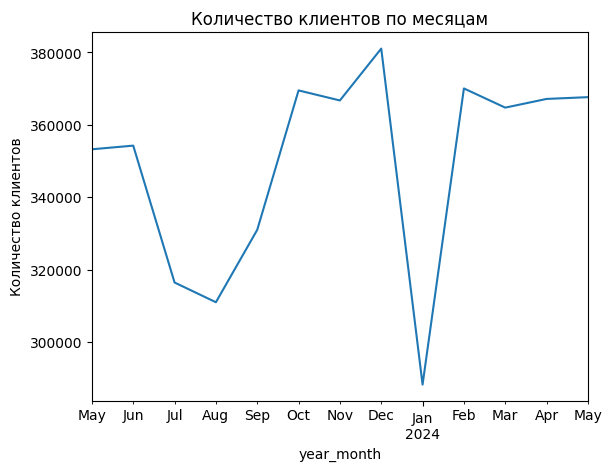

np.int64(0)

In [ ]:
# Создадим новый столбец для месяца и года
df['year_month'] = df['DOCDATE'].dt.to_period('M')

# Считаем количество клиентов по месяцам
clients_per_month = df.groupby('year_month')['CLIENT_ID'].nunique()

# Количество клиентов, которые получают зарплату ежемесячно
monthly_clients = clients_per_month[clients_per_month == 1].count()

# Просмотр результатов
import matplotlib.pyplot as plt

# Построим график количества клиентов по месяцам
clients_per_month.plot(kind='line', title="Количество клиентов по месяцам")
plt.ylabel("Количество клиентов")
plt.show()

# Выведем статистику по клиентам, получающим зарплату ежемесячно
monthly_clients


# Анализ нерегулярных выплат


In [ ]:
# Считаем количество зачислений по каждому клиенту
client_activity = df.groupby('CLIENT_ID')['DOCDATE'].count()

# Определим, какие клиенты получают зарплату нерегулярно
irregular_clients = client_activity[client_activity < 12]  # Меньше 12 выплат в год

# Рассчитаем процент клиентов, которые получают зарплату нерегулярно
irregular_percentage = (len(irregular_clients) / len(client_activity)) * 100

# Выведем процент нерегулярных клиентов
irregular_percentage


51.89393547229325

# Паттерны выплат (дни недели)


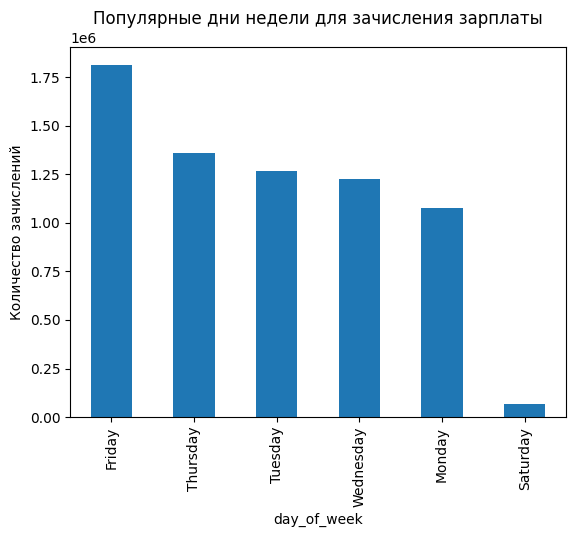

,count
day_of_week,
Friday,1811408
Thursday,1357608
Tuesday,1265423
Wednesday,1225395
Monday,1074529
Saturday,68637


In [ ]:
# Извлечем день недели
df['day_of_week'] = df['DOCDATE'].dt.day_name()

# Подсчитаем количество зачислений по дням недели
day_of_week_counts = df['day_of_week'].value_counts()

# Построим график
day_of_week_counts.plot(kind='bar', title='Популярные дни недели для зачисления зарплаты')
plt.ylabel("Количество зачислений")
plt.show()

# Выведем количество зачислений по дням недели
day_of_week_counts


# Частота получения зарплаты среди клиентов


In [ ]:
# Частота получения зарплаты каждым клиентом (по количеству зачислений)
client_frequency = df.groupby('CLIENT_ID')['DOCDATE'].count()

# Средняя частота получения зарплаты
average_frequency = client_frequency.mean()

# Медианная частота получения зарплаты
median_frequency = client_frequency.median()

# Выведем результаты
average_frequency, median_frequency


(np.float64(11.738741816701005), 11.0)

# Группировка клиентов по частоте зачислений


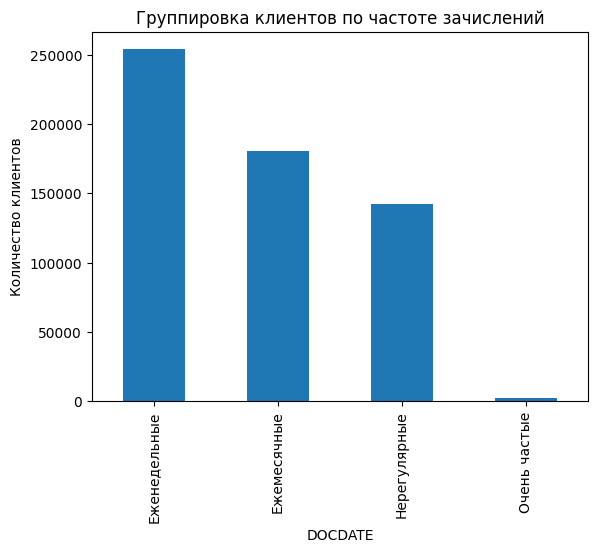

,count
DOCDATE,
Еженедельные,253903
Ежемесячные,180780
Нерегулярные,142429
Очень частые,2325


In [ ]:
# Группировка клиентов по частоте зачислений
bins = [0, 4, 12, 52, 100]  # Примерные интервалы: нерегулярные, ежемесячные, еженедельные и более частые
labels = ['Нерегулярные', 'Ежемесячные', 'Еженедельные', 'Очень частые']
client_groups = pd.cut(client_frequency, bins=bins, labels=labels)

# Подсчитаем количество клиентов в каждой группе
client_groups_counts = client_groups.value_counts()

# Построим график
client_groups_counts.plot(kind='bar', title='Группировка клиентов по частоте зачислений')
plt.ylabel("Количество клиентов")
plt.show()

# Выведем количество клиентов в каждой группе
client_groups_counts


# Аномалии в выплатах


In [ ]:
# Аномально частые или редкие выплаты
outliers = client_frequency[(client_frequency > 50) | (client_frequency < 2)]

# Посмотрим на этих клиентов
outliers


,DOCDATE
CLIENT_ID,
8,75
27,64
64,1
158,151
265,1
...,...
579529,1
579530,1
579531,1


# Динамика зачислений по месяцам


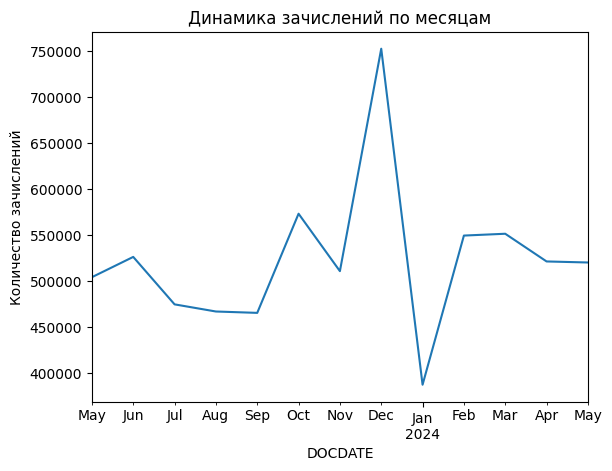

,0
DOCDATE,
2023-05,504160
2023-06,526202
2023-07,474633
2023-08,466869
2023-09,465378
2023-10,573135
2023-11,510734
2023-12,752443
2024-01,387299


In [ ]:
# Подсчитаем количество зачислений по месяцам
monthly_counts = df.groupby(df['DOCDATE'].dt.to_period('M')).size()

# Построим график
monthly_counts.plot(kind='line', title='Динамика зачислений по месяцам')
plt.ylabel("Количество зачислений")
plt.show()

# Выведем результаты по месяцам
monthly_counts


# Топ клиентов с максимальными пропусками


In [ ]:
# Топ клиентов по частоте зачислений
top_clients = client_frequency.sort_values(ascending=False).head(10)

# Выведем результаты
top_clients


,DOCDATE
CLIENT_ID,
8152,218
4893,216
4603,209
3603,203
28148,203
37742,193
6031,188
18766,186
17903,184


# Создание метки оттока для прогнозирования


In [ ]:
# Создадим столбец для метки оттока
df['next_month'] = df['DOCDATE'] + pd.DateOffset(months=1)

# Применим логику для оттока клиентов
# Рассмотрим, что если в следующий месяц после 3 месяцев подряд зачислений не было, то клиент ушел
# Предположим, что клиент ушел, если не было выплат в 4-й месяц

# Проверим, что мы корректно определили отток
df['churn'] = df.groupby('CLIENT_ID')['DOCDATE'].shift(-3).isnull().astype(int)

# Итоговый набор данных с таргетом
target_data = df[['CLIENT_ID', 'DOCDATE', 'churn']].drop_duplicates()

target_data.head()


,CLIENT_ID,DOCDATE,churn
0,0,2024-01-31,0
1,0,2024-05-31,0
2,0,2024-03-19,0
3,0,2024-04-08,0
4,0,2023-08-31,0
